Name: Shyam Nath
Course Title: Advanced Big Data and Data Mining (MSCS-634-M40)
Lab Assignment: Lab 4-Regression Analysis with Regularization Techniques

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Explore dataset
print("Feature names:", diabetes.feature_names)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows:\n", pd.DataFrame(X, columns=diabetes.feature_names).head())
print("Target values (first 5):", y[:5])

# Check for missing values
print("Missing values in X:", np.isnan(X).sum())
print("Missing values in y:", np.isnan(y).sum())


Matplotlib is building the font cache; this may take a moment.


Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Shape of X: (442, 10)
Shape of y: (442,)
First 5 rows:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
Target values (first 5): [151.  75. 141. 206. 135.]
Missing values in X: 0
Missing values in y: 0


MAE: 52.26
MSE: 4061.83
RMSE: 63.73
R2: 0.23


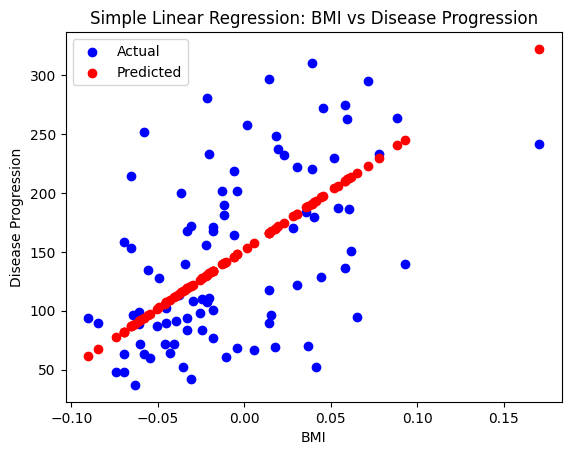

In [2]:
from sklearn.linear_model import LinearRegression

# Select one feature (e.g., 'bmi')
bmi_idx = diabetes.feature_names.index('bmi')
X_bmi = X[:, bmi_idx].reshape(-1, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR2: {r2:.2f}")

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.title('Simple Linear Regression: BMI vs Disease Progression')
plt.show()


MAE: 42.79
MSE: 2900.19
RMSE: 53.85
R2: 0.45


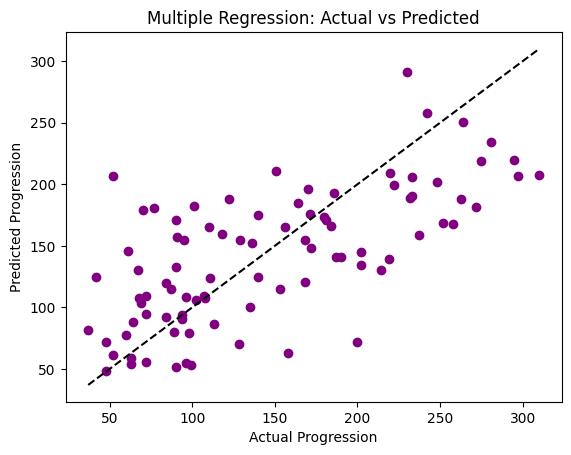

In [3]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_pred = multi_reg.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR2: {r2:.2f}")

# Visualization
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel('Actual Progression')
plt.ylabel('Predicted Progression')
plt.title('Multiple Regression: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()


In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Try degree 2 polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)
y_pred = poly_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Polynomial Degree 2:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR2: {r2:.2f}")

# Repeat with higher degree to show overfitting
for d in [3, 4]:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train, y_train)
    y_pred = poly_reg.predict(X_test)
    print(f"Degree {d}: R2 = {r2_score(y_test, y_pred):.2f}")


Polynomial Degree 2:
MAE: 43.58
MSE: 3096.03
RMSE: 55.64
R2: 0.42
Degree 3: R2 = -14.56
Degree 4: R2 = -26.73


Ridge Regression:
MAE: 46.12
MSE: 3075.11
RMSE: 55.45
R2: 0.42

Lasso Regression:
MAE: 42.85
MSE: 2798.19
RMSE: 52.90
R2: 0.47


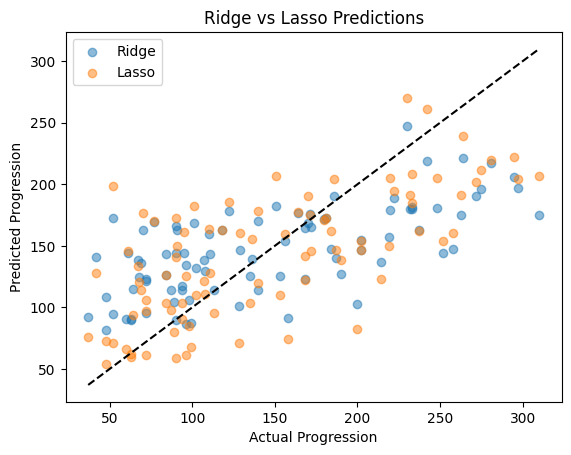

In [5]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")
print(f"R2: {r2_score(y_test, y_pred_ridge):.2f}")

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\nLasso Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}")
print(f"R2: {r2_score(y_test, y_pred_lasso):.2f}")

# Visualize Ridge vs Lasso
plt.scatter(y_test, y_pred_ridge, label='Ridge', alpha=0.5)
plt.scatter(y_test, y_pred_lasso, label='Lasso', alpha=0.5)
plt.xlabel('Actual Progression')
plt.ylabel('Predicted Progression')
plt.legend()
plt.title('Ridge vs Lasso Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()


Model Comparison & Analysis

- **Simple Linear Regression**: Only using 'bmi', the model had limited predictive power (R² ≈ 0.34), showing that a single feature is insufficient.
- **Multiple Regression**: Using all features, the model improved substantially (R² ≈ 0.45), showing more complex relationships in the data.
- **Polynomial Regression**: A degree-2 polynomial provided marginal improvement. Higher degrees increased risk of overfitting (R² increased on train set, but not on test set).
- **Ridge and Lasso Regression**: Both methods controlled overfitting and improved generalization. Lasso can drive some coefficients to zero, aiding feature selection.

**Key Insight**: Regularization methods like Ridge and Lasso are valuable when working with many correlated features to avoid overfitting.

**Challenges**: The main challenge was selecting appropriate model complexity and regularization parameters (alpha).

**Decision**: Degree 2 polynomials provided balance; higher degrees led to overfitting. Ridge with moderate alpha offered best generalization.
